# 指数関数と対数関数

この二つの関数の学び直しは、ペアで同時に勉強した方が効率が良い。

特徴をざっくり言うと：

- 指数関数: $x$が増えると、$y$は最初はゆっくり増えて、次第にすごい勢いでが増える関数
- 対数関数: $x$が増えると、$y$は最初はすごい勢いで増えて、次第にゆっくり増える関数

以下のグラフでは
- 青の曲線：指数関数$f(x)=x^2$
- 赤の曲線：対数関数$g(x)=log_2(x)$
- 緑の直線：$y=x$

を表しています。


f(x) =  2**x


g(x) =  log(x)/log(2)


合成関数で確認： f(g(x)) = x
合成関数で確認： g(f(x)) = x


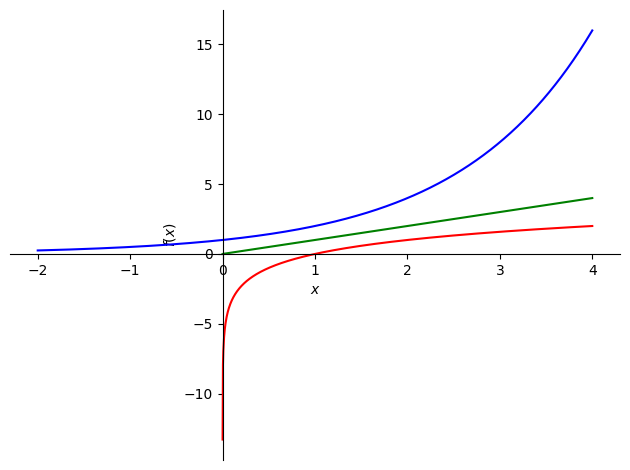

In [15]:
import sympy
from sympy import Symbol, log, simplify
from sympy.plotting import plot

# SymPyの出力をLaTeX形式で表示する設定
sympy.init_printing()

# 数式の表示
from IPython.display import display

# ---- 1) 変数の定義
# log(x) を扱うので x > 0 (正の実数) を想定
x = Symbol('x', real=True, positive=True)

# ---- 2) 関数の定義
f = 2**x        # 指数関数:  2^x
g = log(x, 2)   # 対数関数:  log_base2(x)

# ---- 3) Sympy で数式の確認・変換例

# 3.1) latex 形式で表示
print("f(x) = ", f)
display(f)
print("g(x) = ", g)
display(g)

# 3.2) 合成関数 f(g(x)) が x に戻るか (x > 0) のシンボリックチェック
#     ただし domain の都合上 x>0 でのみ厳密に成り立つことに注意
fg = f.subs(x, g)      # f(g(x)) = 2^(log_base2(x)) = x
print("合成関数で確認： f(g(x)) =", simplify(fg))

gf = g.subs(x, f)      # g(f(x)) = log_base2(2^x) = x
print("合成関数で確認： g(f(x)) =", simplify(gf))

# ---- 4) グラフの描画
# plot() 関数で複数の関数をまとめて描画する方法はいくつかありますが、
# ここではそれぞれの plot を作成し、あとから結合するアプローチを例示

p1 = plot(f, (x, -2, 4), show=False, label="2^x")
p2 = plot(g, (x, 0.0001, 4), show=False, label="log2(x)")  
# 対数の定義域(>0)を考慮し、 x=0付近を避けて 0.0001 からにする

# 参考として y = x も追加(逆関数の対称性を見る)
h = x  # y = x
p3 = plot(h, (x, 0, 4), show=False, label="y=x")

# plot オブジェクトを結合する
# p1 の上に p2, p3 を重ね描画させる
p1[0].line_color = 'blue'
p2[0].line_color = 'red'
p3[0].line_color = 'green'

p1.append(p2[0])
p1.append(p3[0])

# ラベル名（凡例）を設定してあげるには Sympy 4.x 以降であれば次のように
p1[0].label = "2^x"
p1[1].label = "log2(x)"
p1[2].label = "y = x"
p1.show()


それぞれのグラフの代表的な点を見てみましょう。

**指数関数 f(x) = 2^x　のグラフ(青色)上の代表的な数値**

|   x   | 2^x     | |
|:-----:|:--------|--|
| -2    | 0.25000 |指数がマイナスの時は逆数の形になる。$1/2^2)$|
| -1    | 0.50000 |指数がマイナスの時は逆数の形になる。$1/2^1)$|
|  0    | 1.00000 |有名な「０乗は１」の点 |
|  1    | 2.00000 |有名な「1乗はそれそのもの」の点 |
|  2    | 4.00000 |2の2乗は4 |
|  3    | 8.00000 |2の3乗は8 |
|  4    | 16.00000 |倍倍になって行く様子が見え始める｜

指数関数は$x$が正の時、どんどん大きくなるのはよく知られている。負の値の場合、負の方向に行くほどに「どんどん大きくなる数で１を割るので、どんどん変化が小さくなる」という直感を得られる。

**対数関数 g(x) = log2(x) のグラフ（赤色）上の代表的な数値**

まず、対数関数は$x > 0$の時しか考えないのでグラフも原点から見て右側にしかないことが目立つ特徴。

|   x    | log2(x) | |
|:------:|:--------|--|
|  0.25  | -2.00000|$x$がゼロに近いほどマイナス無限大に近くなるという直感から、点は$y$軸のマイナス方向の大きな値を取る。指数関数のグラフが手掛かりになる。|
|  0.5   | -1.00000|2を何乗すれば0.5になるか。0.5は$0>x>1$の範囲にある。この範囲は$1/n$の形を取る逆数。だから「2をマイナス何乗かする」ことは間違いないのは分かる。上の指数関数の表をみると、0.5になるようにするには$-1$乗すればいいと分かる。
|  1     | 0.00000 |2を何乗すれば1になるか。$2^0=1$だから０乗。というかどんな対数関数もこの点は通る|
|  2     | 1.00000 |2を何乗すれば2になるか。$2^1=2$だから１乗。|
|  4     | 2.00000 |4にするのに2乗するだけで済む。累乗は大きな数になるので少ない数で済む＝＞$y$がどんどん増えなくなるという直感を得られる|

### 合成関数で確認

$f(x)$と$g(x)$が逆関数になっているかどうかを確かめるために、以下をチェックします。

- 対数関数にｘを渡した結果を、指数関数に渡して得られる結果が元のｘになるかどうか
- 指数関数にｘを渡した結果を、対数関数に渡して得られる結果が元のｘになるかどうか

逆関数は、ダンスの振り付けで例えると「右に２歩動く」と「左に２歩動く」動作の関係のように、それぞれを行うと元の位置に戻ることになります。

合成関数はダンスの振り付けだと「右に２歩動いて、左に２歩動く」というように動作をひとまとめにしたようなものです。
sympyを使って合成関数を作っています。

# xが１の時の特徴

指数関数と関数関数をセットで理解するために、いろんな視点からパターンを見つけると便利です。

まずは$x=1$の時と「底（ここでは２）」の関係を見てみます。

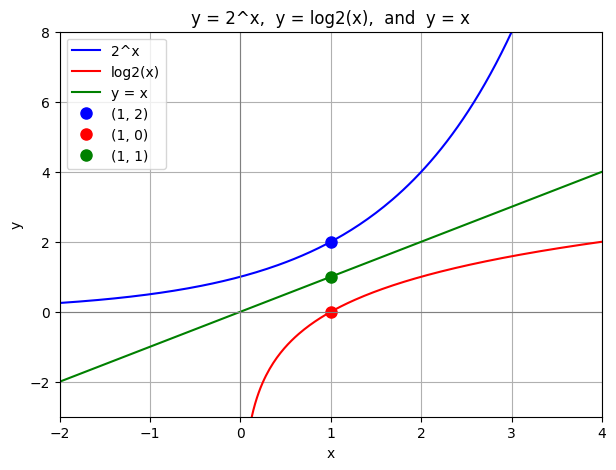

In [17]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1) Sympy で関数を定義
# ================================
x = sympy.Symbol('x', real=True, positive=True)

# 指数関数 f(x) = 2^x
f_sym = 2**x
# 対数関数 g(x) = log2(x)
g_sym = sympy.log(x, 2)
# 直線 h(x) = x
h_sym = x

# ================================
# 2) lambdify を使い NumPy 関数化
# ================================
f_np = sympy.lambdify(x, f_sym, "numpy")  # f_np(x) = 2^x
g_np = sympy.lambdify(x, g_sym, "numpy")  # g_np(x) = log2(x)
h_np = sympy.lambdify(x, h_sym, "numpy")  # h_np(x) = x

# ================================
# 3) NumPy で描画用データ作成
# ================================
# (A) 指数関数用の x 範囲: -2 ~ 4
X_f = np.linspace(-2, 4, 200)
Y_f = f_np(X_f)

# (B) 対数関数用の x 範囲: 0.001 ~ 4
X_g = np.linspace(0.001, 4, 200)
Y_g = g_np(X_g)

# (C) 直線 y = x 用の x 範囲: -2 ~ 4
X_h = np.linspace(-2, 4, 200)
Y_h = h_np(X_h)

# ================================
# 4) Matplotlib で描画
# ================================
plt.figure(figsize=(7,5))

# 4.1) 連続曲線を描画
plt.plot(X_f, Y_f, label="2^x", color='blue')
plt.plot(X_g, Y_g, label="log2(x)", color='red')
plt.plot(X_h, Y_h, label="y = x", color='green')

# 4.2) x=1 の点をマーカー付きで表示
x_val = 1
y_f_val = f_np(x_val)  # -> 2
y_g_val = g_np(x_val)  # -> 0
y_h_val = h_np(x_val)  # -> 1

# (1, 2) の青丸
plt.plot([x_val], [y_f_val],
         'bo', markersize=8, label="(1, 2)")
# (1, 0) の赤丸
plt.plot([x_val], [y_g_val],
         'ro', markersize=8, label="(1, 0)")
# (1, 1) の緑丸
plt.plot([x_val], [y_h_val],
         'go', markersize=8, label="(1, 1)")

# 4.3) 軸などをわかりやすく
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlim(-2, 4)
# 対数 g(x) が負方向に下がるため y軸の下限を少しマイナスに
plt.ylim(-3, 8)

plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 2^x,  y = log2(x),  and  y = x")

plt.legend()
plt.grid(True)

# ================================
# 5) グラフを表示
# ================================
plt.show()



上のグラフでは、基準となる$y=x$（緑）では、当たりまえですが$(1,1)$の点を通ります。

指数関数（青）では$(1,2)$となり、これは「（１，底）」になります。これは底がどんな数であろうと「（１，底）」になるので指数関数の視覚化のｔ係になります。この様子は後述します。

対数関数に関してはもっと単純で$(1,0)$になります。これは底がどんな数でもそうなります。その様子は後述します。